In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dataset = pd.read_csv(r"C:\Users\User\Downloads\upload\recommender_system\ratings_Beauty.csv")

In [3]:
dataset

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [5]:
dataset.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [6]:
dataset['UserId'].nunique(), dataset['UserId'].value_counts().max(), dataset['UserId'].value_counts().min()

(1210271, 389, 1)

In [7]:
dataset['ProductId'].nunique(), dataset['ProductId'].value_counts().max(), dataset['ProductId'].value_counts().min()

(249274, 7533, 1)

In [8]:
user_frequency = pd.DataFrame(dataset.groupby('UserId')['ProductId'].nunique() > 1).reset_index()
old_user = list(user_frequency['UserId'][user_frequency['ProductId']])

In [9]:
item_frequency = pd.DataFrame(dataset.groupby('ProductId')['UserId'].nunique() > 1).reset_index()
old_item = list(item_frequency['ProductId'][item_frequency['UserId']])

In [10]:
dataset = dataset[dataset['UserId'].isin(old_user)]

In [11]:
dataset = dataset[dataset['ProductId'].isin(old_item)]

In [12]:
dataset.shape

(1069875, 4)

In [14]:
pivot = dataset.pivot_table(index='UserId', columns='ProductId', values='Rating')
pivot.head()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\reshape\reshape.py:126: RuntimeWarning: overflow encountered in long_scalars
  num_cells = num_rows * num_columns


ValueError: negative dimensions are not allowed

In [13]:
dataset = dataset.drop(columns='Timestamp')

In [14]:
# Convert UserId and ProductId from str to int
dataset['UserId'] = dataset['UserId'].astype('category').cat.codes
dataset['ProductId'] = dataset['ProductId'].astype('category').cat.codes

In [15]:
dataset

,UserId,ProductId,Rating
1,216177,0,3.0
9,174839,1,4.0
10,27051,1,5.0
11,279924,1,4.0
14,311302,2,5.0
...,...,...,...
2023056,113194,133210,5.0
2023057,43897,133210,5.0
2023060,204475,133210,5.0
2023063,134792,133210,5.0


In [16]:
from surprise import Reader, Dataset

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dataset, reader)

$$ w_i = (\summation_j\element_i)^-1 $$

In [ ]:
# SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()

In [ ]:
# Iterating over all algorithms

from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise.model_selection import cross_validate

algorithm = SVD()

# Perform cross validation
results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

# Get results & append algorithm name
tmp = pd.DataFrame.from_dict(results).mean(axis=0)
tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))

pd.DataFrame(tmp).set_index('Algorithm').sort_values('test_rmse')   

C:\Users\User\AppData\Local\Temp\ipykernel_2912\544534606.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVD,1.177481,0.91183,35.962043,4.189162


In [ ]:
algorithm = SVDpp()

# Perform cross validation
results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

# Get results & append algorithm name
tmp = pd.DataFrame.from_dict(results).mean(axis=0)
tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))

pd.DataFrame(tmp).set_index('Algorithm').sort_values('test_rmse')   

C:\Users\User\AppData\Local\Temp\ipykernel_2912\4181995695.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVDpp,1.177632,0.904391,39.589867,8.671249


In [19]:
pd.DataFrame(results)

,test_rmse,test_mae,fit_time,test_time
0,1.178271,0.904819,42.799877,9.680073
1,1.179892,0.906206,40.016587,8.880272
2,1.177419,0.903471,39.872048,10.532099
3,1.173980,0.901620,44.132320,7.616401
4,1.178596,0.905839,31.128504,6.647400


In [45]:
import gc
gc.collect()

20

In [ ]:
def fit_mf(algorithm):
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))

    return pd.DataFrame(tmp).set_index('Algorithm').sort_values('test_rmse'), pd.DataFrame(results) 

In [25]:
# Iterating over all algorithms
algo = SlopeOne()
fit_mf(algo)

MemoryError: Unable to allocate 58.6 GiB for an array with shape (125395, 125395) and data type int32

In [26]:
algo2 = NMF()
fit_mf(algo2)

C:\Users\User\AppData\Local\Temp\ipykernel_2912\1768877423.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


(           test_rmse  test_mae   fit_time  test_time
 Algorithm                                           
 NMF         1.462242  1.150489  87.715147   2.572203,
    test_rmse  test_mae   fit_time  test_time
 0   1.459693  1.148615  84.226861   4.499506
 1   1.460701  1.150026  88.029468   2.048229
 2   1.462549  1.150252  87.429134   2.476090
 3   1.465600  1.152744  87.223943   1.959342
 4   1.462669  1.150808  91.666331   1.877848)

In [27]:
algo_list = [NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

In [28]:
fit_mf(algo_list[0])

C:\Users\User\AppData\Local\Temp\ipykernel_2912\1768877423.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


(                 test_rmse  test_mae  fit_time  test_time
 Algorithm                                                
 NormalPredictor   1.578832  1.183493  2.929817   2.136128,
    test_rmse  test_mae  fit_time  test_time
 0   1.577346  1.181772  2.302232   2.132163
 1   1.578963  1.183831  2.916833   3.528110
 2   1.577774  1.182232  2.730505   1.317652
 3   1.577927  1.183137  3.717098   2.185157
 4   1.582150  1.186494  2.982420   1.517560)

In [29]:
algo_list[1:4]

In [36]:
fit_mf(algo_list[1])

Estimating biases using als...
Computing the msd similarity matrix...


MemoryError: Unable to allocate 718. GiB for an array with shape (310430, 310430) and data type float64

In [39]:
fit_mf(algo_list[2])

Computing the msd similarity matrix...


MemoryError: Unable to allocate 717. GiB for an array with shape (310151, 310151) and data type float64

In [40]:
fit_mf(algo_list[3])

Computing the msd similarity matrix...


MemoryError: Unable to allocate 719. GiB for an array with shape (310581, 310581) and data type float64

In [41]:
fit_mf(algo_list[4])

Computing the msd similarity matrix...


MemoryError: Unable to allocate 719. GiB for an array with shape (310566, 310566) and data type float64

In [42]:
loss_df = []
for algorithm in algo_list[5:]:
    loss, result = fit_mf(algorithm)
    loss_df.append(loss)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


C:\Users\User\AppData\Local\Temp\ipykernel_2912\1768877423.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\User\AppData\Local\Temp\ipykernel_2912\1768877423.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


In [43]:
fit_mf(algo_list[5])

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


C:\Users\User\AppData\Local\Temp\ipykernel_2912\1768877423.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


(              test_rmse  test_mae   fit_time  test_time
 Algorithm                                              
 BaselineOnly   1.176006  0.920336  10.393923   1.446977,
    test_rmse  test_mae   fit_time  test_time
 0   1.175301  0.920634  12.635711   1.669372
 1   1.177625  0.920545  10.958545   1.584975
 2   1.176657  0.920536   9.838718   1.297020
 3   1.175420  0.920534   9.372858   1.326393
 4   1.175029  0.919430   9.163784   1.357127)

In [44]:
fit_mf(algo_list[6])

C:\Users\User\AppData\Local\Temp\ipykernel_2912\1768877423.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


(              test_rmse  test_mae    fit_time  test_time
 Algorithm                                               
 CoClustering   1.333366  0.910821  100.391736   1.858167,
    test_rmse  test_mae    fit_time  test_time
 0   1.331838  0.908665   95.898518   1.781325
 1   1.332229  0.910711  100.342339   1.871695
 2   1.338967  0.914938  102.400523   1.767183
 3   1.329586  0.908007  101.316364   1.801402
 4   1.334212  0.911783  102.000935   2.069232)

## Keras: Embedding & Gradient Descent & Nueral Network

### Dot product between embeddings

- Also deep learning, but simpler architecture/shallow
- Embedding: a learnable lookup table that maps integer indices (like user or item IDs) to dense vectors of fixed size (embeddings)
 - Dense: a learned linear transformation followed by an optional activation function
 - Bias embedding: help the model capture the average tendency
 - Dot product: gives a similarity score

 - No activation function: not applying nonlinearity
 - Focus on learning compact embeddings from IDs, instead of learning complex features and patterns from raw data


In [17]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from keras.models import Model
from keras.layers import Input, Embedding, Dot, Add, Flatten
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

In [18]:
N = dataset['UserId'].nunique() + 1     # number of users
M = dataset['ProductId'].nunique() + 1  # number of items

In [19]:
# split into train and test
df = shuffle(dataset)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

In [20]:
# intitalize variables
K = 10      # latent dimensionality (features)
mu = df_train['Rating'].mean()
epochs = 15
reg = 0.    # regularization penalty

In [ ]:
# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K, embeddings_regularizer=l2(reg))(u)    # (N, 1, K)
m_embedding = Embedding(M, K, embeddings_regularizer=l2(reg))(m)    
# (N, 1, K)

In [ ]:
# # submodel: testing or inspecting intermediate outputs, like checking the embedding vectors for given user and movie IDs.
# subsubmodel = Model([u, m], [u_embedding, m_embedding])

# user_ids = df_train['UserId'].values[0:5]
# movie_ids = df_train['ProductId'].values[0:5]
# print("user_ids.shape", user_ids.shape)

# # running submodel for predictions & check output shapes
# p = subsubmodel.predict([user_ids, movie_ids])
# print("p[0].shape:", p[0].shape)
# print("p[1].shape:", p[1].shape)
# exit()

user_ids.shape (5,)
1/1 [==============================] - 0s 144ms/step
p[0].shape: (5, 1, 10)
p[1].shape: (5, 1, 10)


In [22]:
# Add bias
u_bias = Embedding(N, 1, embeddings_regularizer=l2(reg))(u)    # (N, 1, 1)
m_bias = Embedding(M, 1, embeddings_regularizer=l2(reg))(m)    # (N, 1, 1)
x = Dot(axes=2)([u_embedding, m_embedding])                    # (N, 1, 1)

In [ ]:
# submodel = Model([u, m], x)
# user_ids = df_train['UserId'].values[0:5]
# movie_ids = df_train['ProductId'].values[0:5]
# p = submodel.predict([user_ids, movie_ids])
# print("p.shape:", p.shape)
# exit()

In [23]:
# Include bias
x = Add()([x, u_bias, m_bias])  # (N, 1, 1)
x = Flatten()(x)    # (N, 1)

In [24]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
    loss='mse',
    # optimizer='adam',
    # optimizer=Adam(lr=0.01),
    optimizer=SGD(lr=0.08, momentum=0.9),
    metrics=['mse']
)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [25]:
# input must not be format other than int
r = model.fit(
    x=[df_train['UserId'].values, df_train['ProductId'].values],
    y=df_train['Rating'].values - mu,
    epochs=epochs,
    batch_size=128,
    validation_data=(
        [df_test['UserId'].values, df_test['ProductId'].values],
        df_test['Rating'].values - mu
    )
)

Epoch 1/15
6687/6687 [==============================] - 245s 36ms/step - loss: 1.4806 - mse: 1.4806 - val_loss: 1.4490 - val_mse: 1.4490
Epoch 2/15
6687/6687 [==============================] - 271s 40ms/step - loss: 1.3750 - mse: 1.3750 - val_loss: 1.4200 - val_mse: 1.4200
Epoch 3/15
6687/6687 [==============================] - 281s 42ms/step - loss: 1.3032 - mse: 1.3032 - val_loss: 1.4019 - val_mse: 1.4019
Epoch 4/15
6687/6687 [==============================] - 282s 42ms/step - loss: 1.2457 - mse: 1.2457 - val_loss: 1.3897 - val_mse: 1.3897
Epoch 5/15
6687/6687 [==============================] - 280s 42ms/step - loss: 1.1968 - mse: 1.1968 - val_loss: 1.3814 - val_mse: 1.3814
Epoch 6/15
6687/6687 [==============================] - 281s 42ms/step - loss: 1.1541 - mse: 1.1541 - val_loss: 1.3750 - val_mse: 1.3750
Epoch 7/15
6687/6687 [==============================] - 251s 37ms/step - loss: 1.1160 - mse: 1.1160 - val_loss: 1.3704 - val_mse: 1.3704
Epoch 8/15
6687/6687 [===================

In [26]:
r.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

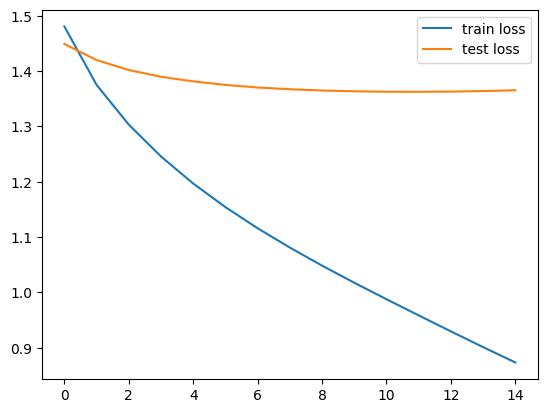

In [27]:
# plot losses
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()

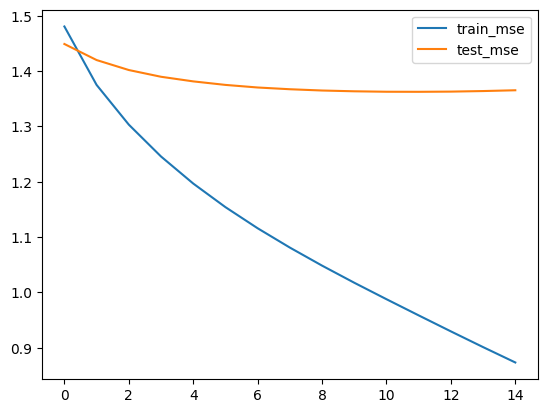

In [28]:
# plot mse
plt.plot(r.history['mse'], label="train_mse")
plt.plot(r.history['val_mse'], label="test_mse")
plt.legend()
plt.show()

- A significant gap (like 0.9 vs. 1.4) suggests overfitting
- On average, the model's predictions are off by around 1 rating point, which is significant for a scale of 0 to 5.

In [ ]:
#  Still can add dropout to prevent overfitting

from tensorflow.keras.layers import SpatialDropout1D

u_embedding = SpatialDropout1D(0.2)(u_embedding)
m_embedding = SpatialDropout1D(0.2)(m_embedding)

In [ ]:
# Reduce embedding size (K) - limit the complexity
# Check regularization strength - increase l2(reg)

### Neural network with more layers (dense layer)

- Learn complex relationship
- Multiple input neural network in this case (user + item embedding)

In [44]:
# https://udemy.com/recommender-systems
# https://deeplearningcourses.com/recommender-systems
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future
# for python2 to python3 compatibility

In [34]:
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.layers import Dropout, BatchNormalization, Activation
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

In [55]:
N = dataset['UserId'].nunique() + 1     # number of users
M = dataset['ProductId'].nunique() + 1  # number of items

In [56]:
# split into train and test
df = shuffle(dataset)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

In [57]:
# intitalize variables
K = 10      # latent dimensionality (features)
mu = df_train['Rating'].mean()
epochs = 15
# reg = 0.    # regularization penalty

In [58]:
# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K)(u)    # (N, 1, K)
m_embedding = Embedding(M, K)(m)    # (N, 1, K)
u_embedding = Flatten()(u_embedding)# (N, K)
m_embedding = Flatten()(m_embedding)# (N, K)
x = Concatenate()([u_embedding, m_embedding]) # (N, 2K), side by side concat, default axis=-1

In [59]:
# Build neural network
# x = Dense(400)(x)               # fully connected (dense) layer with 400 neurons (#nuerons based on data size, complexity)
x = Dense(200)(x)  
# x = BatchNormalization()(x)     # normalize input for next layer, ensure mean=0,var=1 (stabilize&speed up training)
x = Activation('relu')(x)       # introduce non-linearity
# x = Dropout(0.5)(x)             # regularization (drop 50% neurons), not needed if no ovefitting
# x = Dense(100)(x)               # introduce more depth, not needed if already perrforming well/starts simple, needed when underfit
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
x = Dense(1)(x)                 # Final layer: give one score + no activation as output is linear (regression)

🚀 How to Decide Which Layers to Use?
- Start simple with fewer layers and no dropout.
- Monitor performance (loss, accuracy, overfitting).
- If the model overfits ➡️ add Dropout.
- If the model struggles to converge ➡️ try BatchNormalization.
- If the model underfits ➡️ add more layers or neurons.

In [60]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  # optimizer='adam',
  # optimizer=Adam(lr=0.01),
  optimizer=SGD(lr=0.08, momentum=0.9),
  metrics=['mse'],
)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [61]:
r = model.fit(
  x=[df_train['UserId'].values, df_train['ProductId'].values],
  y=df_train['Rating'].values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_train['UserId'].values, df_train['ProductId'].values],
    df_train['Rating'].values - mu
  )
)

Epoch 1/15
6687/6687 [==============================] - 35s 5ms/step - loss: 1.5380 - mse: 1.5380 - val_loss: 1.5058 - val_mse: 1.5058
Epoch 2/15
6687/6687 [==============================] - 31s 5ms/step - loss: 1.4883 - mse: 1.4883 - val_loss: 1.3820 - val_mse: 1.3820
Epoch 3/15
6687/6687 [==============================] - 30s 5ms/step - loss: 1.3574 - mse: 1.3574 - val_loss: 1.1233 - val_mse: 1.1233
Epoch 4/15
6687/6687 [==============================] - 31s 5ms/step - loss: 1.1042 - mse: 1.1042 - val_loss: 0.8984 - val_mse: 0.8984
Epoch 5/15
6687/6687 [==============================] - 31s 5ms/step - loss: 0.8863 - mse: 0.8863 - val_loss: 0.7301 - val_mse: 0.7301
Epoch 6/15
6687/6687 [==============================] - 33s 5ms/step - loss: 0.7397 - mse: 0.7397 - val_loss: 0.5842 - val_mse: 0.5842
Epoch 7/15
6687/6687 [==============================] - 30s 4ms/step - loss: 0.6146 - mse: 0.6146 - val_loss: 0.4938 - val_mse: 0.4938
Epoch 8/15
6687/6687 [==============================] -

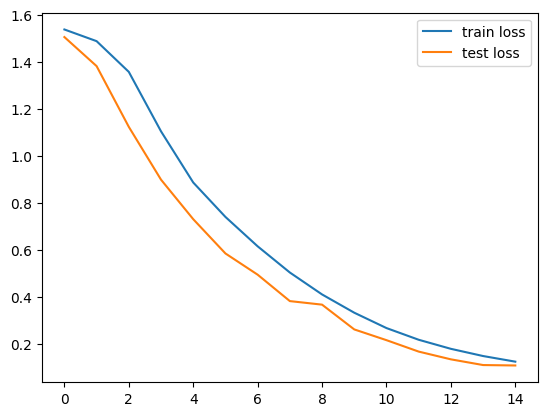

In [62]:
# plot losses
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()

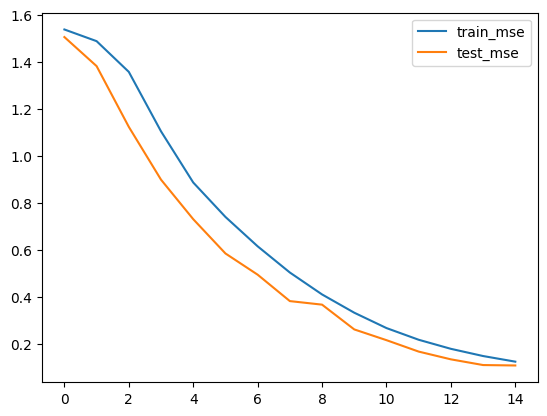

In [63]:
# plot mse
plt.plot(r.history['mse'], label="train_mse")
plt.plot(r.history['val_mse'], label="test_mse")
plt.legend()
plt.show()

In [ ]:
# looks good using deep network
# can experiment using different parameters (eg. number of neurons, add layers, dropout, regularization)

### Residual Learning

In [29]:
# split into train and test
df = shuffle(dataset)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

In [30]:
# intitalize variables
K = 10      # latent dimensionality (features)
mu = df_train['Rating'].mean()
epochs = 15
reg = 0.    # regularization penalty

In [31]:
# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K, embeddings_regularizer=l2(reg))(u)    # (N, 1, K)
m_embedding = Embedding(M, K, embeddings_regularizer=l2(reg))(m)    # (N, 1, K)

In [54]:
u_embedding

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'flatten_6')>

In [32]:
##### main branch
u_bias = Embedding(N, 1)(u) # (N, 1, 1)
m_bias = Embedding(M, 1)(m) # (N, 1, 1)
x = Dot(axes=2)([u_embedding, m_embedding]) # (N, 1, 1)
x = Add()([x, u_bias, m_bias])
x = Flatten()(x) # (N, 1)

In [35]:
##### side branch
u_embedding = Flatten()(u_embedding) # (N, K)
m_embedding = Flatten()(m_embedding) # (N, K)
y = Concatenate()([u_embedding, m_embedding]) # (N, 2K)
y = Dense(200)(y)
y = Activation('elu')(y)
# y = Dropout(0.5)(y)
y = Dense(1)(y)

In [36]:
##### merge
x = Add()([x, y])

In [37]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  # optimizer='adam',
  # optimizer=Adam(lr=0.01),
  optimizer=SGD(lr=0.08, momentum=0.9),
  metrics=['mse'],
)

In [38]:
r = model.fit(
  x=[df_train['UserId'].values, df_train['ProductId'].values],
  y=df_train['Rating'].values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_train['UserId'].values, df_train['ProductId'].values],
    df_train['Rating'].values - mu
  )
)

Epoch 1/15
6687/6687 [==============================] - 277s 41ms/step - loss: 1.4818 - mse: 1.4818 - val_loss: 1.1401 - val_mse: 1.1401
Epoch 2/15
6687/6687 [==============================] - 285s 43ms/step - loss: 1.2417 - mse: 1.2417 - val_loss: 0.9123 - val_mse: 0.9123
Epoch 3/15
6687/6687 [==============================] - 328s 49ms/step - loss: 1.0002 - mse: 1.0002 - val_loss: 0.7622 - val_mse: 0.7622
Epoch 4/15
6687/6687 [==============================] - 294s 44ms/step - loss: 0.8666 - mse: 0.8666 - val_loss: 0.6762 - val_mse: 0.6762
Epoch 5/15
6687/6687 [==============================] - 296s 44ms/step - loss: 0.7821 - mse: 0.7821 - val_loss: 0.6342 - val_mse: 0.6342
Epoch 6/15
6687/6687 [==============================] - 314s 47ms/step - loss: 0.7117 - mse: 0.7117 - val_loss: 0.5522 - val_mse: 0.5522
Epoch 7/15
6687/6687 [==============================] - 291s 43ms/step - loss: 0.6412 - mse: 0.6412 - val_loss: 0.4808 - val_mse: 0.4808
Epoch 8/15
6687/6687 [===================

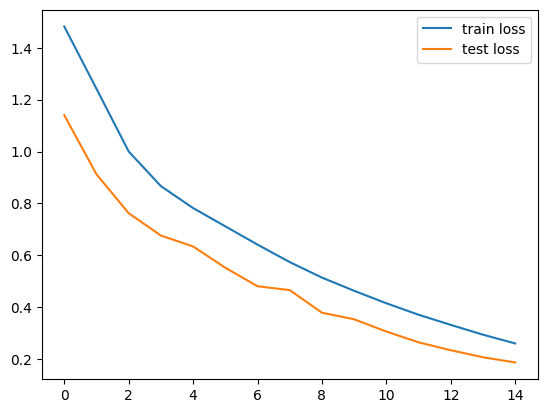

In [39]:
# plot losses
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()

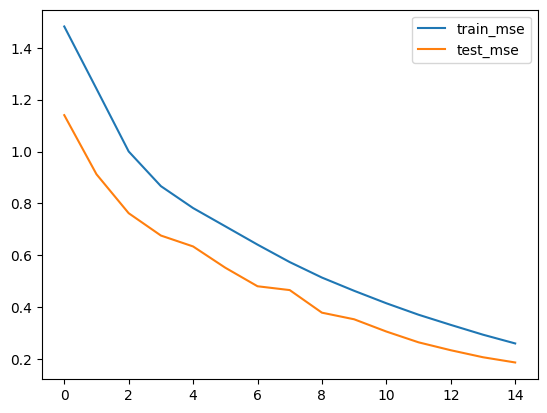

In [40]:
# plot mse
plt.plot(r.history['mse'], label="train_mse")
plt.plot(r.history['val_mse'], label="test_mse")
plt.legend()
plt.show()

- Check Contribution via Loss Weighting
    - If the components are added together, you can introduce weights to control their influence:

            - final_output = Add()([alpha * dot_product_output, (1 - alpha) * dense_output])

### Hybrid Model: combining dot embedding and dense layer
$$ same as residual learning part $$

In [55]:
# split into train and test
df = shuffle(dataset)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

In [56]:
# intitalize variables
K = 10      # latent dimensionality (features)
mu = df_train['Rating'].mean()
epochs = 15
reg = 0.    # regularization penalty

In [57]:
# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))

# Embedding layers
u_embedding = Embedding(N, K, embeddings_regularizer=l2(reg))(u)    # (N, 1, K)
m_embedding = Embedding(M, K, embeddings_regularizer=l2(reg))(m)    # (N, 1, K)

u_embedding = Flatten()(u_embedding) # (N, K)
m_embedding = Flatten()(m_embedding) # (N, K)

In [58]:
# Bias layers
u_bias = Embedding(N, 1)(u) # (N, 1, 1)
m_bias = Embedding(M, 1)(m) # (N, 1, 1)

u_bias = Flatten()(u_bias) # (N, 1)
m_bias = Flatten()(m_bias) # (N, 1)

In [59]:
# Dot product for linear interaction
x = Dot(axes=1)([u_embedding, m_embedding]) # (N, K)   you ady flatten it before dot???

### Can you trust ChatGPT?
- The Dot(axes=2) operation expects a (batch_size, 1, K) ⊗ (batch_size, 1, K) structure to compute a proper dot product.
- If embeddings are flattened before the dot product, they become (batch_size, K) ⊗ (batch_size, K), which is different from the intended dot product.
- This changes the mathematical interaction between user and item embeddings, losing relational structure.

- Keep the embeddings in (batch_size, 1, K) shape until after the Dot operation. Flattening should only be done after computing interactions.

In [60]:
# Dense layers for non-linear interaction
y = Concatenate()([u_embedding, m_embedding]) # (N, 2K)

y = Dense(200)(y)
y = Activation('relu')(y)
# y = Dropout(0.5)(y)
# y = Dense(100)(y)
# y = Activation('relu')(y)
y = Dense(1)(y)

In [61]:
final_output = Add()([x, u_bias, m_bias, y]) # (N, 1)??? hape not same, how to add???
x = Dense(1)(final_output) # (N, 1), cannot use flatten here because flatten will make it become (N,)

In [62]:
model = Model(inputs=[u, m], outputs=final_output)
model.compile(
  loss='mse',
  # optimizer='adam',
  # optimizer=Adam(lr=0.01),
  optimizer=SGD(lr=0.08, momentum=0.9),
  metrics=['mse'],
)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [63]:
r = model.fit(
  x=[df_train['UserId'].values, df_train['ProductId'].values],
  y=df_train['Rating'].values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_train['UserId'].values, df_train['ProductId'].values],
    df_train['Rating'].values - mu
  )
)

Epoch 1/15
6687/6687 [==============================] - 233s 35ms/step - loss: 1.5034 - mse: 1.5034 - val_loss: 1.4746 - val_mse: 1.4746
Epoch 2/15
6687/6687 [==============================] - 240s 36ms/step - loss: 1.4353 - mse: 1.4353 - val_loss: 1.3899 - val_mse: 1.3899
Epoch 3/15
6687/6687 [==============================] - 249s 37ms/step - loss: 1.3781 - mse: 1.3781 - val_loss: 1.3298 - val_mse: 1.3298
Epoch 4/15
6687/6687 [==============================] - 241s 36ms/step - loss: 1.3295 - mse: 1.3295 - val_loss: 1.2864 - val_mse: 1.2864
Epoch 5/15
6687/6687 [==============================] - 167s 25ms/step - loss: 1.2789 - mse: 1.2789 - val_loss: 1.1559 - val_mse: 1.1559
Epoch 6/15
6687/6687 [==============================] - 190s 28ms/step - loss: 1.1596 - mse: 1.1596 - val_loss: 0.9568 - val_mse: 0.9568
Epoch 7/15
6687/6687 [==============================] - 200s 30ms/step - loss: 0.8642 - mse: 0.8642 - val_loss: 0.4630 - val_mse: 0.4630
Epoch 8/15
6687/6687 [===================

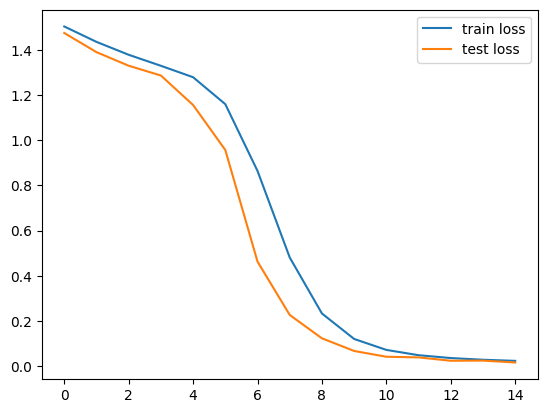

In [64]:
# plot losses
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()

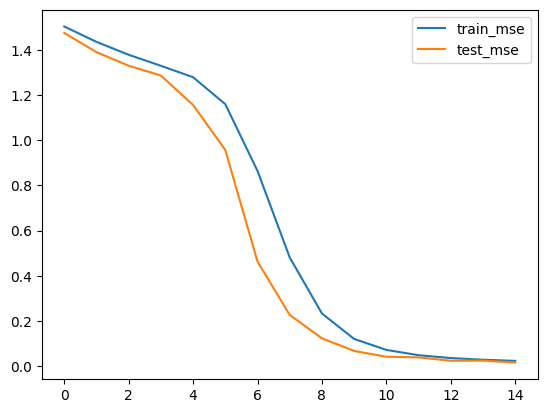

In [65]:
# plot mse
plt.plot(r.history['mse'], label="train_mse")
plt.plot(r.history['val_mse'], label="test_mse")
plt.legend()
plt.show()